In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
web_page = pd.read_html("https://en.wikipedia.org/wiki/COVID-19_pandemic_in_India","Recoveries")[1]

In [4]:
web_page = web_page.iloc[:,:5]

In [5]:
web_page.columns = ['states','total cases','death','recoveries','active cases']

In [6]:
web_page.drop([36,37],inplace=True)


In [7]:
web_page

,states,total cases,death,recoveries,active cases
0,Andaman and Nicobar Islands,2680,31,1638,1011
1,Andhra Pradesh,325396,3001,235218,87177
2,Arunachal Pradesh,3066,5,2093,968
3,Assam,"86,052[b]",221,63120,22711
4,Bihar,114941,492,87660,26789
5,Chandigarh,2515,31,1390,1094
6,Chhattisgarh,18501,168,11739,6594
7,Dadra and Nagar Haveli and Daman and Diu,2030,2,1627,401
8,Delhi,157354,4257,141826,11271
9,Goa,13099,126,9063,3910


In [8]:
web_page['death'][16] =  web_page['death'][16].strip('[]bac')
web_page['total cases'][3] =  web_page['total cases'][3].strip('[]ba').replace(',',"")


In [12]:
death = pd.Series(map(int,web_page['death']))
total = pd.Series(map(int,web_page['total cases']))
recovery = pd.Series(map(int,web_page['recoveries']))
active = pd.Series(map(int,web_page['active cases']))

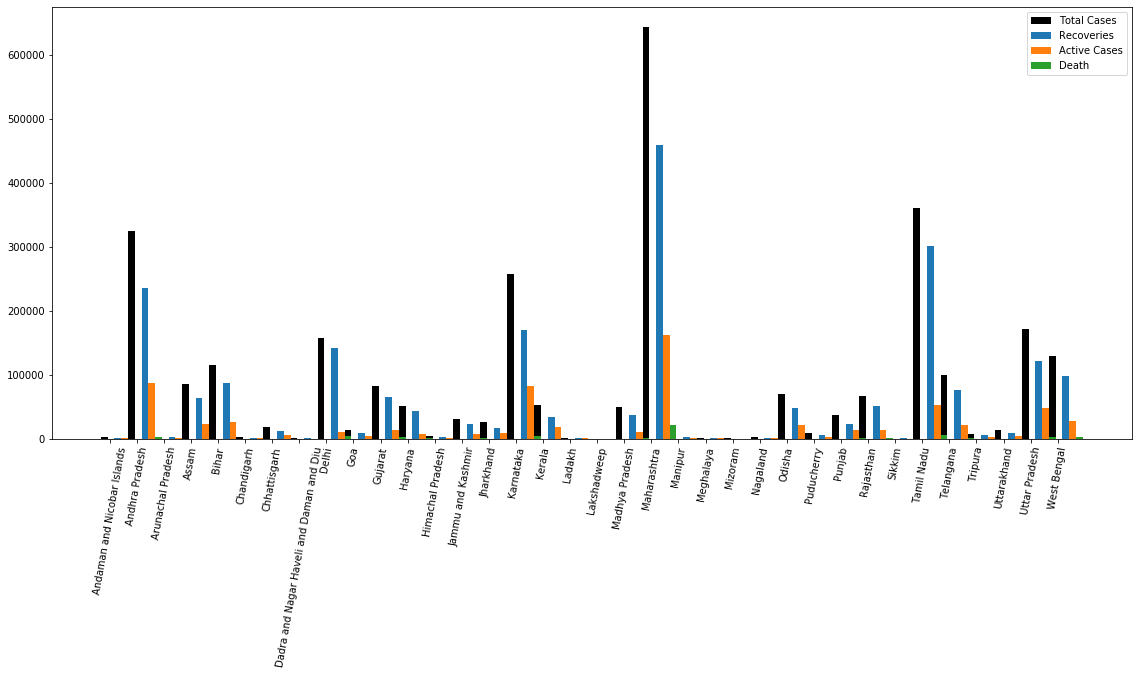

In [14]:
fig = plt.figure(figsize=(15,6))
axes = fig.add_axes([0,0,1,1])
x = np.arange(0,36*4,step=4)
axes.bar(x,total,width=1,label="Total Cases",color="k")
axes.bar(x+2,recovery,width=1,label="Recoveries")
axes.bar(x+3,active,width=1,label="Active Cases")
axes.bar(x+4,death,width=1,label="Death")
plt.xticks(x+0.8,web_page["states"],rotation=80)
axes.legend()
plt.show()